## Desafio Machine Learning - Manipulae

Este repositório contém um dataset com 7121 fórmulas de medicamentos manipulados. O objetivo do teste é prever o valor da coluna "correto" com menor erro possível a partir das outras informações do dataset dos 7121 pontos de dados, podem usar no máximo os primeiros 5121 dados do dataset para prever os últimos 2000

Resolução:

1) Fizemos a Análise dos dados para ajustarmos o dataframe

2) visualizamos os outliers com os gráficos

3) achamos com o método de Tukey

4) Retiramos do nosso domínio

5) Criamos o modelo com o novo conjunto de dados e treinamos este modelo

6) fizemos a previsão com a regressão linear simples

7) fizemos a média daquele intervalo para visualizar se o valor previsto estava muito distante

8) mostramos graficamente a dispersão com a reta da previsão

## Importando as Bibliotecas necessárias e criando a função dos outliers
##### a função dos outliers foi baseada no método de Tukey ou mais conhecido como boxplot define limites inferior e superior

In [2]:
# Pandas pelo dataframe
from pandas import read_csv as pd_read_csv

# Numpy pelas operações matemáticas (array por ex.)
from numpy import percentile as np_percentile, unique as np_unique
from yellowbrick.regressor import ResidualsPlot

# Sklearn.model_selection pela regressão linear, split de treino e teste e Validação Cruzada
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Sklearn.metrics para medir os errosfrom sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

# Sklearn.preprocessing para usar método RobustScaler para achar os outlier
from sklearn.preprocessing import RobustScaler

# Matplotlib pelos gráficos
from matplotlib import pyplot as plt

%matplotlib inline

In [58]:
# faz upgrade da biblioteca que está desatualizada
# !pip install yellowbrick --upgrade

In [4]:
# podemos criar uma função para usar o método de tukey e achar os outliers
# método tukey: consiste em achar os limites inferior e superior e não admitir qualquer ponto fora desses limites
def remove_outlier(values):
    """
    Remove valores discrepantes.

    Parameters
    ----------
    values : list[float]
        Lista de valores.

    Returns
    -------
    result : list[float]
        Lista de valores sem os valores discrepantes.
    """

    fator = 1.5

    q3, q1 = np_percentile(values, [75, 25])

    iqr = (q3)-(q1)

    lowpass = q1 - (iqr * fator)

    highpass = q3 + (iqr * fator)

    result = [v for v in values if v > lowpass and v < highpass]

    return result

## Análise Exploratória

In [5]:
# vamos ler a tabela CSV
df = pd_read_csv("https://raw.githubusercontent.com/manipulaeHealth/desafio-machine-learning/main/dados_preco.csv")

In [6]:
# forma dos dados
df.shape

(7121, 5)

In [7]:
# tipos dos dados
df.dtypes

descricao      object
criado         object
qtdInsumos      int64
calculado     float64
correto       float64
dtype: object

In [8]:
# vamos ver quantos valores nulos tem
df.isna().sum()

descricao     0
criado        0
qtdInsumos    0
calculado     0
correto       0
dtype: int64

In [9]:
# visualizar as primeiras linhas
df.head(10)

,descricao,criado,qtdInsumos,calculado,correto
0,30 CAP | BUPROPIONA CLORIDRATO 150MG,2020-08-05 23:19:09,1,47.5297,39.9
1,60 CAP | FINASTERIDA 1:10 1MG,2020-08-05 22:51:09,1,46.9620,43.6
2,60 CAP | NAC 250MG; SILIMARINA 150MG; SAME ...,2020-08-05 22:51:09,3,105.1390,111.4
3,60 CAP | ANASTROZOL 1:10 0.300MG,2020-08-05 22:51:09,1,49.0314,43.6
4,120 CAP | DUTASTERIDA 0.250MG; TADALAFIL 10MG,2020-08-05 22:49:09,2,161.8272,146.0
5,240 CAP | TRIIODOTIRONINA SLOW RELEASE 12MCG,2020-08-05 22:48:09,1,40.6362,77.0
6,120 CAP | T4 60MCG,2020-08-05 22:47:09,1,35.1005,50.0
7,60 CAP | VITAMINA B2 30MG; VITAMINA B3 60MG;...,2020-08-05 22:40:09,14,248.2063,272.2
8,60 CAP | CORTISOL 20MG; PRASTERONA 20MG,2020-08-05 22:37:10,2,220.1472,206.6
9,30 CAP | TADALAFIL 10MG; ARGININA 2G,2020-08-05 22:37:10,2,134.5175,127.4


In [10]:
# visualizar as ultimas linhas
df.tail(10)

,descricao,criado,qtdInsumos,calculado,correto
7111,90 CAP | ACIDOPHILUS LACTOBACILLUS 100MG; BIF...,2020-07-09 17:39:10,6,122.6624,111.0
7112,36 CAP | VITAMINA D 7000UI,2020-07-09 17:39:10,1,33.7296,44.0
7113,90 CAP | CARDO MARIANO 100MG; ALTILIX (BIONAP...,2020-07-09 17:38:10,2,347.3672,325.0
7114,30 CAP | PASSIFLORA PO 200MG; MELISSA EXT SEC...,2020-07-09 17:37:09,3,45.7487,40.0
7115,90 CAP | TRIPTOFANO 300MG; ASHWAGANDHA EXTRAT...,2020-07-09 17:34:09,2,185.9843,178.3
7116,45 CAP | SERTRALINA CLORIDRATO 40MG; SLENDEST...,2020-07-09 17:33:11,12,188.5325,181.8
7117,120 CAP | GREENSELECT 120MG,2020-07-09 17:24:09,1,377.6529,346.6
7118,60 CAP | MAGNESIO QUELADO 30% 220MG; SELENIO ...,2020-07-09 17:23:10,11,166.2868,157.2
7119,30 CAP | VALERIANA 50MG; PASSIFLORA 500MG; C...,2020-07-09 17:22:09,3,60.1646,68.1
7120,60 CAP | ACIDO TRANEXAMICO 200MG; BIOTINA 2.5...,2020-07-09 17:14:09,2,107.0370,95.3


In [11]:
# describe dá um resumo estatístico
df.describe()

,qtdInsumos,calculado,correto
count,7121.000000,7121.000000,7121.000000
mean,3.281842,137.089552,135.891798
std,3.194301,191.266516,189.806974
min,1.000000,30.000100,33.000000
25%,1.000000,49.786100,49.500000
50%,2.000000,87.350300,83.100000
75%,4.000000,165.167000,161.200000
max,26.000000,10364.992500,10356.000000


In [12]:
# Criando uma matriz de correlação para cruzar as variáveis
df.corr().style.bar(subset='correto', align='mid', color=['#d65f5f', '#5fba7d'])

,qtdInsumos,calculado,correto
qtdInsumos,1.000000,0.232302,0.254238
calculado,0.232302,1.000000,0.982201
correto,0.254238,0.982201,1.000000


In [13]:
# vamos fazer uma cópia para não alterarmos o original
df_teste = df.copy()

In [14]:
# olhamos as primeiras linhas de todas as colunas do nosso dataframe
df_teste.head()

,descricao,criado,qtdInsumos,calculado,correto
0,30 CAP | BUPROPIONA CLORIDRATO 150MG,2020-08-05 23:19:09,1,47.5297,39.9
1,60 CAP | FINASTERIDA 1:10 1MG,2020-08-05 22:51:09,1,46.9620,43.6
2,60 CAP | NAC 250MG; SILIMARINA 150MG; SAME ...,2020-08-05 22:51:09,3,105.1390,111.4
3,60 CAP | ANASTROZOL 1:10 0.300MG,2020-08-05 22:51:09,1,49.0314,43.6
4,120 CAP | DUTASTERIDA 0.250MG; TADALAFIL 10MG,2020-08-05 22:49:09,2,161.8272,146.0


## Pré-Processamento

In [15]:
# deixamos o preço "calculado" com o valor unitário de insumo
# df_teste["calculado"] = [calc/qtde for calc, qtde in df_teste[["calculado", "qtdInsumos"]].values]
df_teste["calculado"] = df_teste["calculado"] / df_teste["qtdInsumos"]

In [16]:
# deixamos o preço "correto" com o valor unitário
# df_teste["correto"] = [corr/qtde for corr, qtde in df_teste[["correto","qtdInsumos"]].values]
df_teste["correto"] = df_teste["correto"] / df_teste["qtdInsumos"]

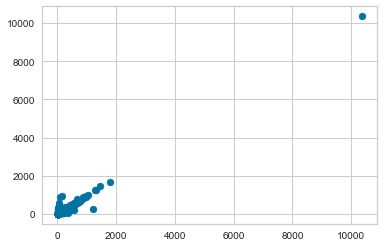

In [17]:
# gráfico de dispersão para tentarmos visualizar outliers
plt.scatter(df_teste["calculado"], df_teste["correto"])
plt.show()

In [18]:
# Fatiando as linhas da 1 até a 5121
x = df_teste.iloc[:5121, 3].values
y = df_teste.iloc[:5121, 4].values

In [19]:
# Aplicando Tukey para retirar os outlier
df_teste = df_teste[df_teste['calculado'].isin(remove_outlier(x))]

In [20]:
# Confirmando a mudança com o resumo estatístico
df_teste.describe()

,qtdInsumos,calculado,correto
count,5040.000000,5040.000000,5040.000000
mean,3.274405,45.288435,45.602711
std,3.145020,30.249578,32.274965
min,1.000000,2.994540,2.660000
25%,1.000000,22.230750,22.847500
50%,2.000000,36.648350,40.000000
75%,4.000000,59.675694,57.450000
max,26.000000,143.562600,896.600000


In [21]:
# Achando a quantidade de linha após a retirada de Outliers
len(df_teste)

5040

In [22]:
# Atribuindo para modificar o X e o Y
x = df_teste['calculado'].values
y = df_teste['correto'].values

## Visualização Gráfica do Pré-Processamento

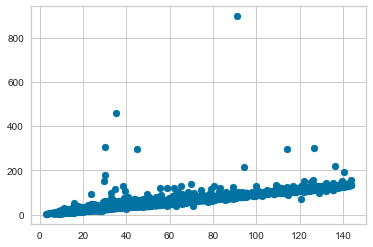

In [23]:
# gráfico de dispersão do novo x e novo y (com o corte de linhas)
plt.scatter(x, y)
plt.show()

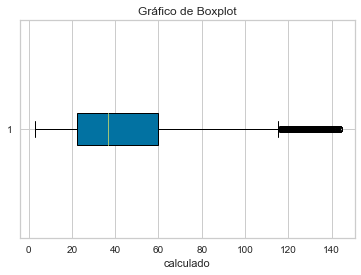

In [24]:
# gráfico Boxplot do "calculado" mostrando os outliers
plt.boxplot(x, vert=False, showfliers=True, notch=False, patch_artist=True)
plt.title("Gráfico de Boxplot")
plt.xlabel("calculado")
plt.show()

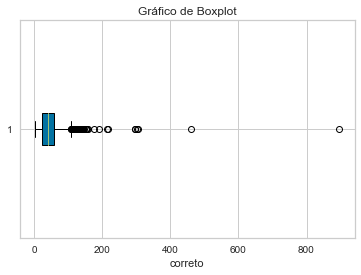

In [25]:
# gráfico Boxplot do "correto" mostrando os outliers
plt.boxplot(y, vert=False, showfliers=True, notch=False, patch_artist=True)
plt.title("Gráfico de Boxplot")
plt.xlabel("correto")
plt.show()

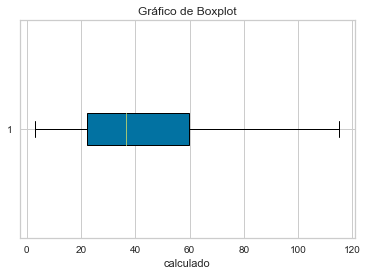

In [26]:
# gráfico Boxplot do "calculado" sem mostrar os outliers
plt.boxplot(x, vert=False, showfliers=False, notch=False, patch_artist=True)
plt.title("Gráfico de Boxplot")
plt.xlabel("calculado")
plt.show()

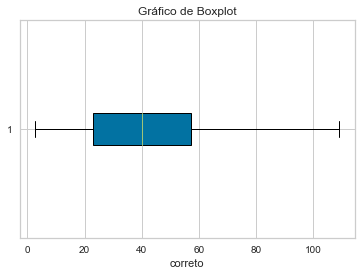

In [27]:
# gráfico Boxplot do "correto" mostrando os outliers
plt.boxplot(y, vert=False, showfliers=False, notch=False, patch_artist=True)
plt.title("Gráfico de Boxplot")
plt.xlabel("correto")
plt.show()

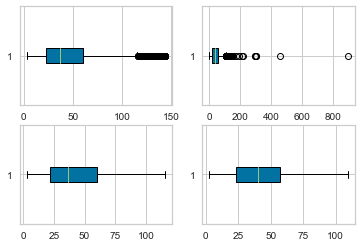

In [28]:
# plotar os 4 gráficos numa mesma região para uma comparação visual
plt.figure(1)
plt.subplot(2,2,1)
plt.boxplot(x, vert=False, showfliers=True, notch=False, patch_artist=True)
plt.subplot(2,2,2)
plt.boxplot(y, vert = False, showfliers = True, notch = False, patch_artist = True)
plt.subplot(2,2,3)
plt.boxplot(x, vert = False, showfliers = False, notch = False, patch_artist = True)
plt.subplot(2,2,4)
plt.boxplot(y, vert = False, showfliers = False, notch = False, patch_artist = True)
plt.show()

## Processamento

In [29]:
# redimensionar 
x = x.reshape(-1,1)

In [30]:
# atribui uma regressão linear e treinar esse modelo
modelo = LinearRegression()
modelo.fit(x, y)

LinearRegression()

In [31]:
# valor do intercepto
modelo.intercept_

3.960176387023367

In [32]:
# coeficiente
modelo.coef_

array([0.919496])

In [33]:
# calcula o score do modelo para sabermos o quão eficiente ele é
modelo.score(x, y)

0.7426886149940379

In [34]:
# faz as previsões baseada na regressão linear
previsoes = modelo.predict(x)

In [47]:
df_teste.tail(6)

,descricao,criado,qtdInsumos,calculado,correto
7085,30 CAP | VITAMINA D3 1:100 60000UI,2020-07-09 18:41:10,1,56.640000,48.4
7091,60 CAP | DOXEPINA CLORIDRATO 3MG,2020-07-09 18:27:09,1,40.234500,43.6
7097,60 CAP | SIBUTRAMINA CLORIDRATO 5MG,2020-07-09 18:08:10,1,49.247500,43.6
7110,30 CAP | VITAMINA D3 1:100 14000UI,2020-07-09 17:39:10,1,36.216000,39.9
7111,90 CAP | ACIDOPHILUS LACTOBACILLUS 100MG; BIF...,2020-07-09 17:39:10,6,20.443733,18.5
7112,36 CAP | VITAMINA D 7000UI,2020-07-09 17:39:10,1,33.729600,44.0


In [53]:
# calcunado a média naquele intervalo para sabermos se o valor achado se aproxima da média
df_teste.query('calculado > 56 & calculado < 57')['calculado'].mean()

56.541460396825386

In [50]:
# 1º exemplo de previsão
# 7085 30 CAP | VITAMINA D3 1:100 60000UI 2020-07-09 18:41:10 1 (56.640000 48.4)
previsoes = modelo.predict([[56.640000]])
previsoes

array([56.04042975])

In [55]:
# calcunado a média naquele intervalo para sabermos se o valor achado se aproxima da média
df_teste.query('calculado > 40 & calculado < 41')['calculado'].mean()

40.48543349023198

In [54]:
# 2º exemplo de previsão
# 7091 60 CAP | DOXEPINA CLORIDRATO 3MG 2020-07-09 18:27:09 1 (40.234500 43.6)
previsoes = modelo.predict([[40.234500]])
previsoes

array([40.95563814])

In [57]:
# calcunado a média naquele intervalo para sabermos se o valor achado se aproxima da média
df_teste.query('calculado > 36 & calculado < 37')['calculado'].mean()

36.47792336774647

In [56]:
# 3º exemplo de previsão
# 7110 30 CAP | VITAMINA D3 1:100 14000UI 2020-07-09 17:39:10 1 (36.216000 39.9)
previsoes = modelo.predict([[36.216000]])
previsoes

array([37.26064347])

Text(0, 0.5, 'Valores Corretos')

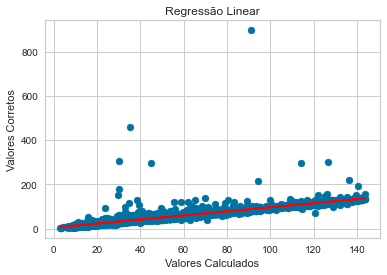

In [43]:
# Gráfico de dispersão com uma reta representando a Regressão Linear
plt.scatter(x,y)
plt.plot(x,modelo.predict(x), color = 'red')
plt.title("Regressão Linear")
plt.xlabel("Valores Calculados")
plt.ylabel("Valores Corretos")